## NAME:- Rasika B Bhandarkavathe

## Task 2: Prediction Using Unsupervisied ML

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Loading the iris datasets
df=pd.read_csv('C:/Users/RK/Desktop/Spark Foundation/iris.csv',header=0)
df.drop(['Id'],axis=1,inplace=True)
df.head() #see the first 5 datasets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Species']=l.fit_transform(df['Species'])
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

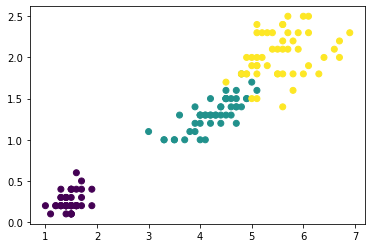

In [7]:
#PetalLengthCm VS PetalWidthCm
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

## Data Visualization

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

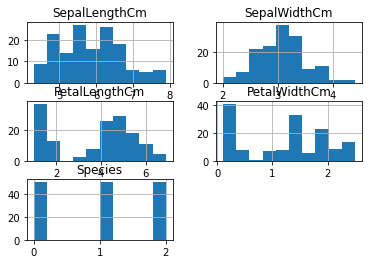

In [8]:
df.hist()

In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

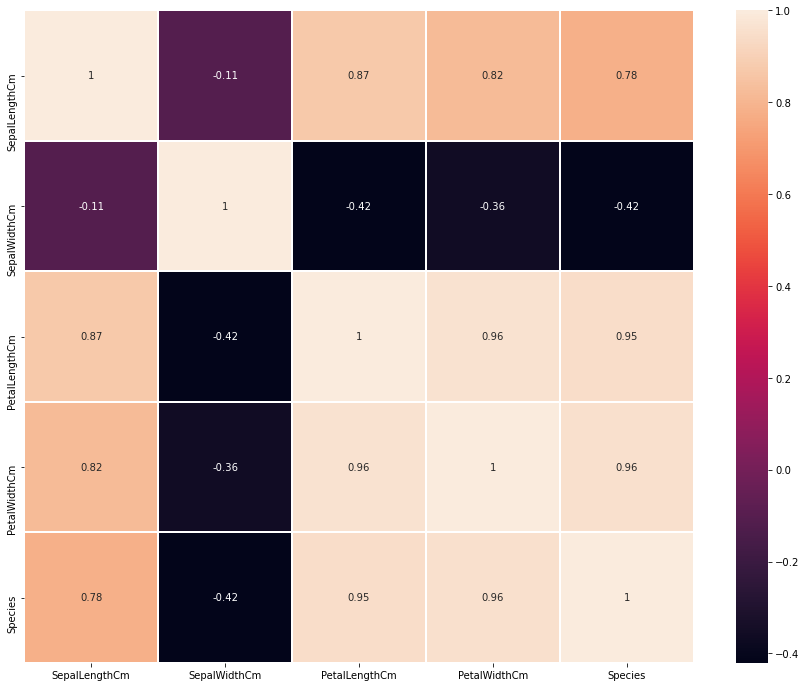

In [10]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

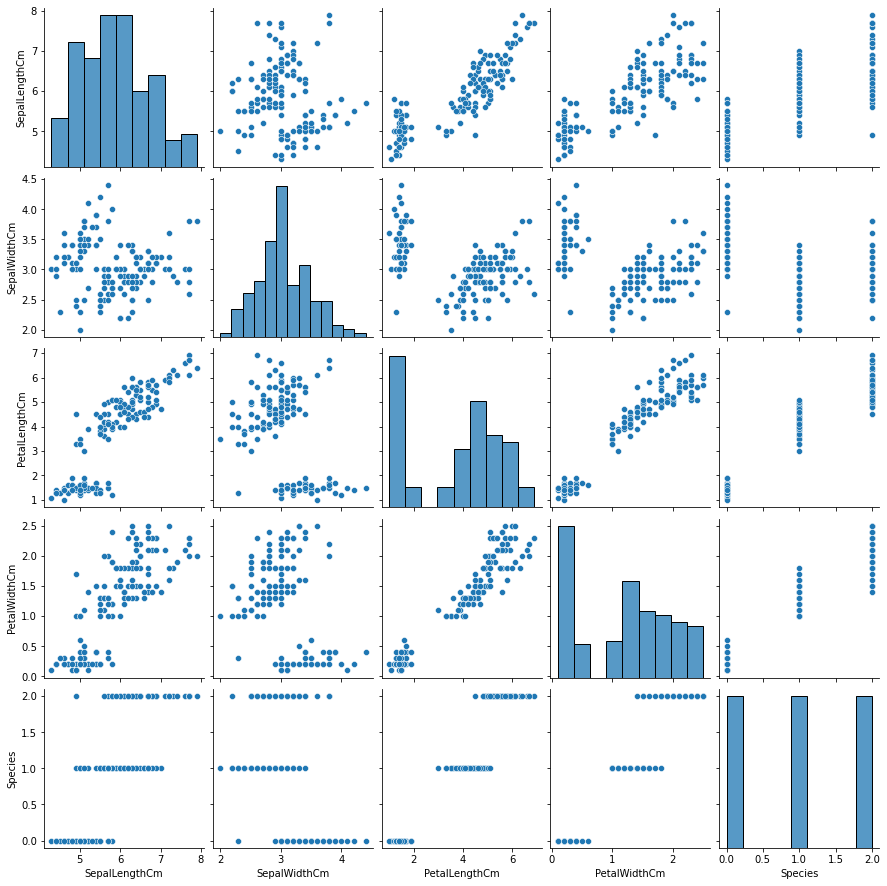

In [11]:
sns.pairplot(df)


### We can see that Species is mainly depend on Petal Length and Petal Width.

## Finding the optimum number of clusters for K-means 

In [12]:
df=df.iloc[:,[0,1,2,3]].values

In [13]:
from sklearn.cluster import  KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
wcss
    

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

### Using Elbow graph to find optimum number of cluster 


C:\Users\RK\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


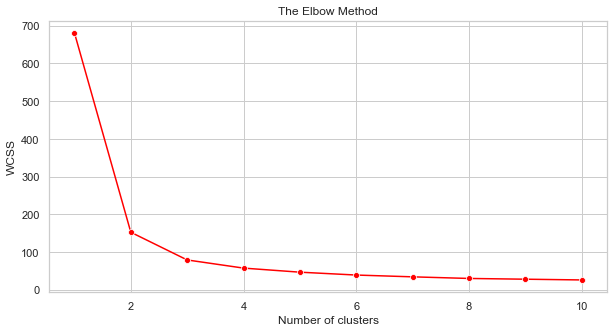

In [23]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1,11), wcss,marker='o',color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### The optimum value for k would be 3. As we can see that eith an increse in the number of clusters the WCSS value decrases. We select the value for k on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in WCSS is minimal

## Creating the k-means classifier

In [16]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing the clusters

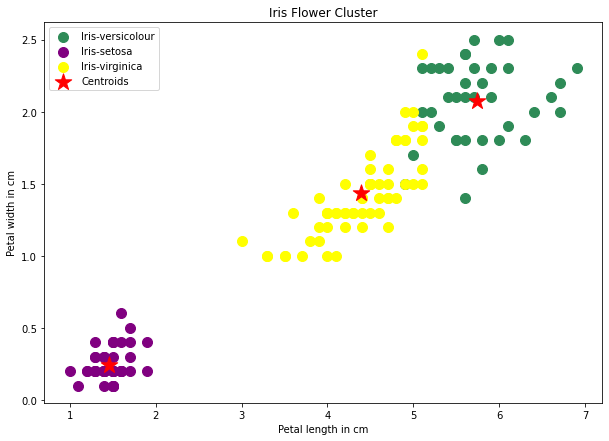

In [17]:
fig=plt.figure(figsize=(10,7))
plt.title('Cluster with Centroids',fontweight='bold',fontsize=20)
plt.scatter(df[y_kmeans==0,2],df[y_kmeans==0,3],s=100,c='seagreen',label='Iris-versicolour')
plt.scatter(df[y_kmeans==1,2],df[y_kmeans==1,3],s=100,c='purple',label='Iris-setosa')
plt.scatter(df[y_kmeans==2,2],df[y_kmeans==2,3],s=100,c='yellow',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 300, c = 'red',marker='*', label = 'Centroids')
plt.title('Iris Flower Cluster')
plt.ylabel('Petal width in cm')
plt.xlabel('Petal length in cm')
plt.legend()

### We can see that our predicted graph is quite similar to the actual one.